In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import fresh_data.get_datasets
import importlib
importlib.reload(fresh_data.get_datasets) # reload get_datasets every time this cell is run
from fresh_data.get_datasets import *


## Constituent Demographics:

In [4]:
kff = load_KFF_data("KFF/")
kff.head()

,location,poverty_children_0-18,poverty_adults_19-64,poverty_65+,total,white,black,hispanic,asian,american_indian/alaska_native,native_hawaiian/other_pacific_islander,multiple_races,year
0,United States,0.161,0.117,0.109,0.126,0.577,0.117,0.192,0.058,0.005,0.002,0.049,2022
1,Alabama,0.221,0.155,0.123,0.165,0.645,0.252,0.048,0.014,0.002,NaN,0.039,2022
2,Alaska,0.147,0.104,0.101,0.114,0.577,0.028,0.073,0.061,0.128,0.016,0.116,2022
3,Arizona,0.157,0.120,0.105,0.126,0.518,0.043,0.325,0.035,0.033,0.001,0.044,2022
4,Arkansas,0.220,0.157,0.131,0.168,0.677,0.141,0.085,0.015,0.004,0.004,0.074,2022


In [5]:
total_population = get_populations("census_demographics")
total_population.head()

,Area,2020,2010,2000,1990,1980,1970
0,Alabama,5024279.0,4779736.0,4447100.0,4040587.0,3893888.0,3444165.0
1,Alaska,733391.0,710231.0,626932.0,550043.0,401851.0,300382.0
2,Arizona,7151502.0,6392017.0,5130632.0,3665228.0,2718215.0,1770900.0
3,Arkansas,3011524.0,2915918.0,2673400.0,2350725.0,2286435.0,1923295.0
4,California,39538223.0,37253956.0,33871648.0,29760021.0,23667902.0,19953134.0


In [6]:
religions = get_religions()
religions.head()

,State,Believe in God; absolutely certain,Believe in God; fairly certain,Believe in God; not too/not at all certain,Believe in God; don't know,Do not believe in God,Other/don't know if they believe in God,Buddhist,Catholic,Evangelical Protestant,Hindu,Historically Black Protestant,Jehovah's Witness,Jewish,Mainline Protestant,Mormon,Muslim,Orthodox Christian,"Unaffiliated (religious ""nones"")"
0,Alabama,0.82,0.12,0.02,0.01,0.02,0.02,0.01,0.01,0.03,0.01,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,Alaska,0.55,0.24,0.05,0.01,0.12,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01
2,Arizona,0.62,0.20,0.06,0.01,0.10,0.02,0.02,0.02,0.02,0.04,0.01,0.04,0.02,0.02,0.07,0.02,0.01,0.02
3,Arkansas,0.77,0.15,0.02,0.01,0.04,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
4,California,0.54,0.22,0.08,0.01,0.12,0.02,0.26,0.16,0.09,0.30,0.05,0.17,0.14,0.08,0.10,0.15,0.15,0.14


#### Merge KFF demographics with total population by state df:

In [7]:
# Drop US entries in the KFF table, we only care about state values:
us_mask = kff[kff["location"]=="United States"].index
kff = kff.drop(us_mask)

In [8]:
def merge_decennial(x,year_population_df,year):
    state_population_in_year = year_population_df[year_population_df["Area"] == x["location"]].iloc[0][year]
    x["population"] = state_population_in_year
    return x

def get_decennial_year(year):
    return str(year[:-1]+"0")
    # if int(year[-1]) < 5: 
    #     return year[:-1]+"0"
    # else:
    #     return str(int(year[:-1])+1) + "0"

In [9]:
# Perform merge:
kff = kff.apply(lambda x: merge_decennial(x, total_population[["Area", get_decennial_year(str(x["year"]))]], get_decennial_year(str(x["year"]))),axis=1)
kff

,location,poverty_children_0-18,poverty_adults_19-64,poverty_65+,total,white,black,hispanic,asian,american_indian/alaska_native,native_hawaiian/other_pacific_islander,multiple_races,year,population
1,Alabama,0.221,0.155,0.123,0.165,0.645,0.252,0.048,0.014,0.002,NaN,0.039,2022,5024279.0
2,Alaska,0.147,0.104,0.101,0.114,0.577,0.028,0.073,0.061,0.128,0.016,0.116,2022,733391.0
3,Arizona,0.157,0.120,0.105,0.126,0.518,0.043,0.325,0.035,0.033,0.001,0.044,2022,7151502.0
4,Arkansas,0.220,0.157,0.131,0.168,0.677,0.141,0.085,0.015,0.004,0.004,0.074,2022,3011524.0
5,California,0.150,0.111,0.116,0.121,0.337,0.051,0.404,0.153,0.002,0.003,0.049,2022,39538223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,Virginia,0.142,0.092,0.083,0.104,0.670,0.191,0.068,0.049,NaN,NaN,0.019,2008,7078515.0
724,Washington,0.150,0.106,0.080,0.114,0.753,0.032,0.098,0.066,0.013,NaN,0.035,2008,5894121.0
725,West Virginia,0.220,0.163,0.105,0.167,0.937,0.031,0.011,0.010,NaN,NaN,0.014,2008,1808344.0
726,Wisconsin,0.135,0.097,0.077,0.104,0.852,0.054,0.051,0.022,0.010,NaN,0.015,2008,5363675.0


<AxesSubplot:xlabel='year'>

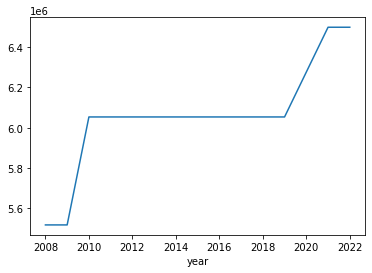

In [10]:
kff.groupby("year")["population"].mean().plot()

#### Merge KFF and current state religion stats:

In [11]:
state_demographics = pd.merge(
    kff,
    religions,
    how="left",
    left_on="location",
    right_on="State"
)
state_demographics

,location,poverty_children_0-18,poverty_adults_19-64,poverty_65+,total,white,black,hispanic,asian,american_indian/alaska_native,...,Evangelical Protestant,Hindu,Historically Black Protestant,Jehovah's Witness,Jewish,Mainline Protestant,Mormon,Muslim,Orthodox Christian,"Unaffiliated (religious ""nones"")"
0,Alabama,0.221,0.155,0.123,0.165,0.645,0.252,0.048,0.014,0.002,...,0.03,0.01,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,Alaska,0.147,0.104,0.101,0.114,0.577,0.028,0.073,0.061,0.128,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01
2,Arizona,0.157,0.120,0.105,0.126,0.518,0.043,0.325,0.035,0.033,...,0.02,0.04,0.01,0.04,0.02,0.02,0.07,0.02,0.01,0.02
3,Arkansas,0.220,0.157,0.131,0.168,0.677,0.141,0.085,0.015,0.004,...,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
4,California,0.150,0.111,0.116,0.121,0.337,0.051,0.404,0.153,0.002,...,0.09,0.30,0.05,0.17,0.14,0.08,0.10,0.15,0.15,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Virginia,0.142,0.092,0.083,0.104,0.670,0.191,0.068,0.049,NaN,...,0.03,0.02,0.05,0.01,0.02,0.03,0.03,0.04,0.06,0.02
710,Washington,0.150,0.106,0.080,0.114,0.753,0.032,0.098,0.066,0.013,...,0.02,0.03,0.01,0.04,0.01,0.02,0.05,0.01,0.02,0.03
711,West Virginia,0.220,0.163,0.105,0.167,0.937,0.031,0.011,0.010,NaN,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
712,Wisconsin,0.135,0.097,0.077,0.104,0.852,0.054,0.051,0.022,0.010,...,0.02,0.01,0.01,0.02,0.01,0.02,0.01,0.02,0.02,0.02


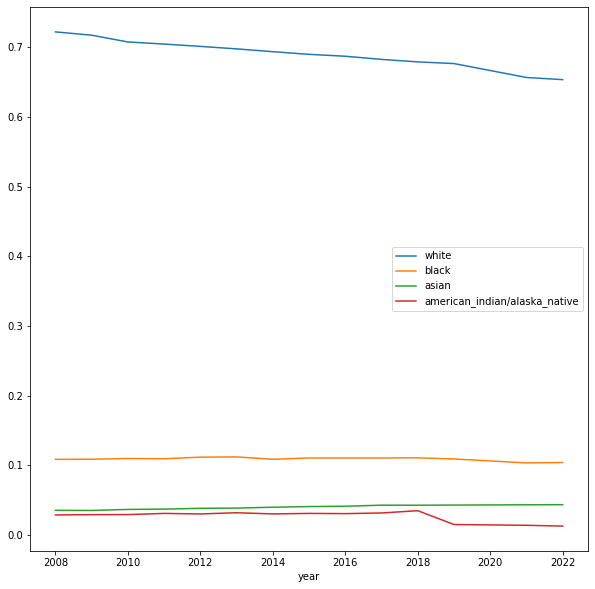

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

for race in ["white", "black", "asian", "american_indian/alaska_native"]:
    state_demographics.groupby("year")[race].mean().plot(ax=ax, label=race)

ax.legend()

In [13]:
state_demographics

,location,poverty_children_0-18,poverty_adults_19-64,poverty_65+,total,white,black,hispanic,asian,american_indian/alaska_native,...,Evangelical Protestant,Hindu,Historically Black Protestant,Jehovah's Witness,Jewish,Mainline Protestant,Mormon,Muslim,Orthodox Christian,"Unaffiliated (religious ""nones"")"
0,Alabama,0.221,0.155,0.123,0.165,0.645,0.252,0.048,0.014,0.002,...,0.03,0.01,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,Alaska,0.147,0.104,0.101,0.114,0.577,0.028,0.073,0.061,0.128,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01
2,Arizona,0.157,0.120,0.105,0.126,0.518,0.043,0.325,0.035,0.033,...,0.02,0.04,0.01,0.04,0.02,0.02,0.07,0.02,0.01,0.02
3,Arkansas,0.220,0.157,0.131,0.168,0.677,0.141,0.085,0.015,0.004,...,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
4,California,0.150,0.111,0.116,0.121,0.337,0.051,0.404,0.153,0.002,...,0.09,0.30,0.05,0.17,0.14,0.08,0.10,0.15,0.15,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Virginia,0.142,0.092,0.083,0.104,0.670,0.191,0.068,0.049,NaN,...,0.03,0.02,0.05,0.01,0.02,0.03,0.03,0.04,0.06,0.02
710,Washington,0.150,0.106,0.080,0.114,0.753,0.032,0.098,0.066,0.013,...,0.02,0.03,0.01,0.04,0.01,0.02,0.05,0.01,0.02,0.03
711,West Virginia,0.220,0.163,0.105,0.167,0.937,0.031,0.011,0.010,NaN,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
712,Wisconsin,0.135,0.097,0.077,0.104,0.852,0.054,0.051,0.022,0.010,...,0.02,0.01,0.01,0.02,0.01,0.02,0.01,0.02,0.02,0.02
